# Numerical Integration

In [1]:
import numpy as np
from scipy.integrate import simpson, quad, dblquad
import matplotlib.pyplot as plt

# Example 1

### Define the function

In [2]:
f = lambda x: 0.5 + 0.1*x + 0.2*x**2 + 0.03*x**3

### Analytical solution

\\( f(x) = \frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3 \\)

\\( A = \int_{-3}^3 f(x)\,\mathrm{d}x = \int_{-3}^3\left(\frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3\right)\,\mathrm{d}x = \left[\frac{1}{2}x + \frac{1}{20}x^2 + \frac{1}{15}x^3 + \frac{3}{400}x^4\right]_{-3}^3\\)

In [3]:
( 1/2*(3) + 1/20*(3)**2 + 1/15*(3)**3 + 3/400*(3)**4 ) - ( 1/2*(-3) + 1/20*(-3)**2 + 1/15*(-3)**3 + 3/400*(-3)**4 )

6.6

### Create data

In [4]:
a = -3
b = 3
n = 13
x = np.linspace(a, b, n)
y = f(x)

### Create plot

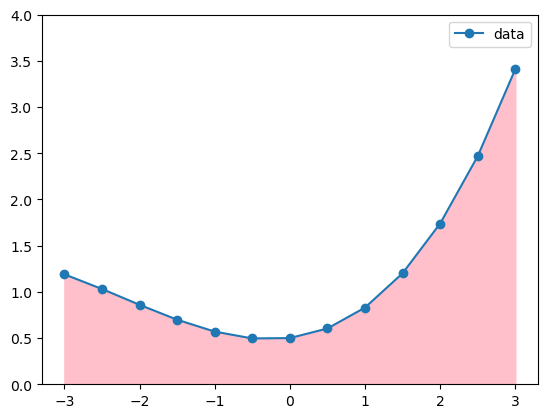

In [5]:
plt.plot(x, y, '-o', label = 'data')
plt.ylim(0, 4)
plt.legend()
plt.fill_between(x, y, color = 'pink')

## 1. Trapezoidal rule

Corresponds to integrating a linear spline through the data points. It is now possible to properly deal with non-equidistant data.

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \sum_{i=1}^{n-1} \frac{f(x_{i+1})+f(x_{i})}{2}(x_{i+1}-x_i)\\)

### Using for loop

In [6]:
def integralTrapezoidal(x, y):
    A = 0
    n = len(x)
    A = sum((y[i+1] + y[i]) / 2*(x[i+1] - x[i]) for i in range(n-1))
    return A

integralTrapezoidal(x, y)

6.650000000000001

### Using Numpy arrays

In [7]:
def integralTrapezoidal2(x, y):
    dx = np.diff(x)
    A = sum((y[1:] + y[:-1]) / 2 * dx)
    return A

integralTrapezoidal2(x, y)

6.650000000000001

### Using Numpy package

In [8]:
np.trapz(y, x)

6.650000000000001

## 2. Simpson rule

This method corresponds to integrating a polynomial interpolation function through the data points. The coefficients have been optimized accordingly.

Careful! This method works only if there are an **odd number** of data points.

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1} \left[ \frac{1}{3}f(x_1) + \frac{4}{3}f(x_2) + \frac{2}{3}f(x_3) + \frac{4}{3}f(x_4) + \dots + \frac{4}{3}f(x_{n-3}) + \frac{2}{3}f(x_{n-2}) + \frac{4}{3}f(x_{n-1}) + \frac{1}{3}f(x_n) \right]\\)

### Using Numpy arrays

In [9]:
def integralSimpson(x, y):
    n = len(x)
    b  = x[-1]
    a = x[0]
    term = ((b-a)/(n-1))
    return term*( 1/3*y[0] + 4/3*sum(y[1:-1:2]) + sum(2/3*y[2:-1:2]) + 1/3*y[-1])

integralSimpson(x, y)

6.6

### Using Scipy package

In [10]:
simpson(y, x)

6.6000000000000005

# Example 2

### Define the function

In [11]:
g = lambda x: x*np.sin(x)

The result of analytical solution is 1

### Using Numpy and Scipy packages

In [12]:
a = 0
b = np.pi/2
n = 100
x = np.linspace(a, b, n)

print('Trapezoidal rule using numpy:', np.trapz(g(x), x))
print('Gauss-Kronrod quadrature algorithm using scipy:', quad(g, a, b))
print('Simpson rule:', simpson(g(x), x))

Trapezoidal rule using numpy: 1.00002097942522
Gauss-Kronrod quadrature algorithm using scipy: (1.0, 1.1102230246251565e-14)
Simpson rule: 1.0000000743305


*Note that the second value of the Gauss-Kronrod is the estimated absolute error.*

# Double Integrations

# Example 3

\\( \int_{x=0}^{x=2} \int_{y=0}^{y=1} xy^2dydx \\)

In [13]:
h = lambda y, x: x*y**2
dblquad(h, 0, 2, 0, 1)

(0.6666666666666667, 7.401486830834377e-15)

# Example 4

\\( \int_{x=0}^{x=1} \int_{y=x}^{y=2-x} axy^2dydx \\) for a = 1,3.

In [14]:
l = lambda y, x, a: a*x*y
print(dblquad(l, 0, 1, lambda x: x, lambda x: 2-x, args=(1,)), 'for a=1')
print(dblquad(l, 0, 1, lambda x: x, lambda x: 2-x, args=(3,)), 'for a=3')

(0.33333333333333337, 5.551115123125783e-15) for a=1
(1.0, 1.6653345369377348e-14) for a=3


# Example 5

Compute the two-dimensional Gaussian Integral, which is the integral of the Gaussian function

\\( \int \int_{-\infty}^{+\infty} e^{-(x^2 + y^2)}dydx \\)

In [15]:
m = lambda x, y: np.exp(-(x ** 2 + y ** 2))
dblquad(m, -np.inf, np.inf, -np.inf, np.inf)

(3.141592653589777, 2.5173086737433208e-08)

# Example 6

\\( \int_{y=-1}^{y=1} \int_{x=1}^{x=2} (x^2y + xy^2)dxdy \\)

In [16]:
q = lambda x, y: x**2*y + x*y**2

In [17]:
dblquad(q, -1, 1, 1, 2)
print('The absolute error is', dblquad(q, -1, 1, 1, 2)[1])

The absolute error is 4.230171575788777e-14


In [18]:
I, _ = dblquad(q, -1, 1, 1, 2)
print('The integral value is', I)

The integral value is 1.0
